# Testing the R installation via Anaconda

Loading LME4 to check if it works

In [1]:
library(lme4)

Loading required package: Matrix


## Load ABR data from cross-species paper

In [2]:
dat <- read.csv('~/Dropbox/ManuscriptsPosters/Mai_et_al/HumanData_TO_SHARE/Mai_et_al_ABRdata.csv', header=TRUE)

In [3]:
str(dat)

'data.frame':	166 obs. of  11 variables:
 $ ID    : Factor w/ 166 levels "0186e07548d3bde9",..: 83 123 28 130 107 128 26 141 152 51 ...
 $ Age   : int  23 25 25 23 24 23 23 24 28 28 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 2 1 1 1 1 2 2 1 1 ...
 $ Group : Factor w/ 3 levels "ctrl","ma","nexp": 1 1 1 1 1 1 1 1 1 1 ...
 $ LFA   : num  6.25 5 0 8.75 2.5 5 3.75 0 6.25 8.75 ...
 $ HFA   : num  11.67 6.67 5 18.33 10 ...
 $ EHFA  : num  8.75 0 1.25 1.25 5 ...
 $ w1    : num  0.905 1.677 1.357 1.08 1.178 ...
 $ w5    : num  0.548 0.92 0.804 0.531 0.594 ...
 $ DPhfa : num  13.62 5.67 -3.94 4.21 2.15 ...
 $ DPehfa: num  -12.5 -25.7 -20.2 -20.2 -32.7 ...


## Compute ABR wave I/V ratio


In [4]:
dat$IVrat <- dat$w1/dat$w5

In [5]:
library(ggplot2)
p <- ggplot(aes(y=IVrat, x=Group), data=dat) + geom_boxplot()

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

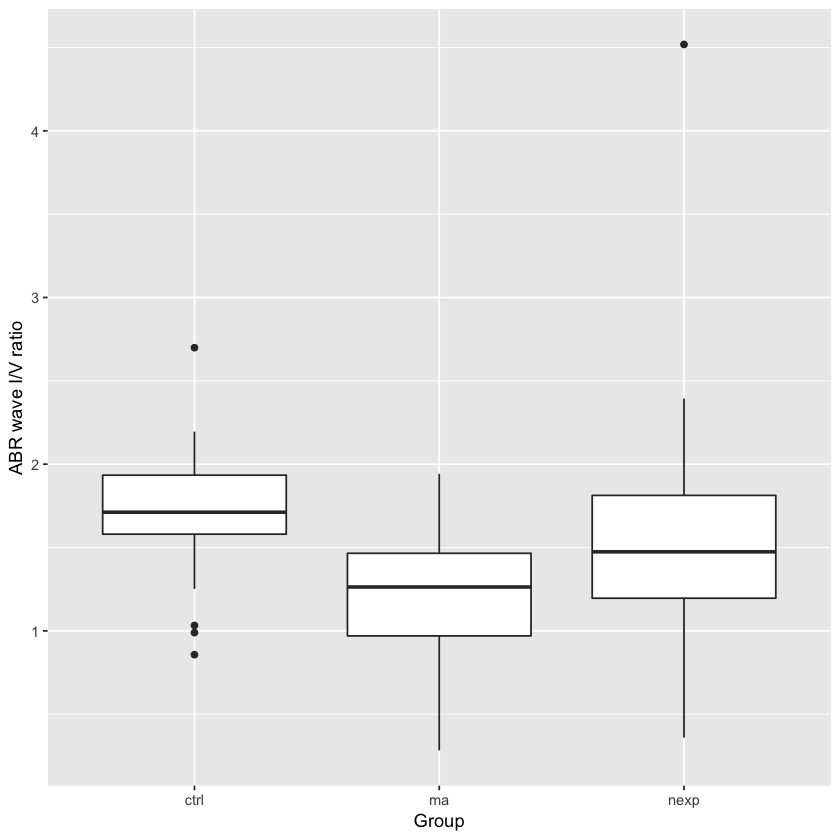

In [6]:
p + xlab('Group') + ylab('ABR wave I/V ratio')

## Is ABR I/V ratio is different between groups after accounting for audiogram variations?

Do a simple linear model (no random effects). Use Type II wald statistics-based model comparison using the Anova() function in the ```car``` package

In [7]:
m <- lm(IVrat ~ LFA + HFA + EHFA + Group, data=dat)
library(car)
Anova(m, test.statistic = 'F')

Loading required package: carData
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


,Sum Sq,Df,F value,Pr(>F)
LFA,6.529769e-02,1,0.3234931,0.5703338304
HFA,4.184033e-02,1,0.2072824,0.6495388733
EHFA,4.191657e-04,1,0.0020766,0.9637114759
Group,3.145430e+00,2,7.7914307,0.0005953248
Residuals,3.148889e+01,156,NA,NA


Results indicate that there is indeed a main effect of group after regressing out audiograms